## Project on Used car sales anaysis.

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

- As the world evolving in all directions significantly, the economic gaps between the people are still exist. The livelihood of different people from different financial backgrounds are changing alot. When it comes to the comfortable travel the cars are playing a vital role.


- Also, considering the COVID pandemic, most of the lower and middle income group of people also attracting to travel in a safe environment and not willing to choose public transport.


- At the same time the car manufactureres also increased the price of the new cars, which is directly effecting the buying capability of low income group people.


- Hence, most of the people are looking at the used cars now. 



- There are few people who cannot afford to buy new luxury car, but they wish to travel in it. For those, this used cars are the sunlight in dark.


- This used cars has become an oportunity for the business. And it's going to genereate a decent revenue for business as well.

---
<a name = Section2></a>
# **2. Problem Statement**
---




  - **Car Deal** is a new company which started the business about an year ago to sell used cars in the market.
  
  
  - Because of the COVID pandemic this company was unable to sell the expeced number of cars to improve it's business.
  
  
  - As the situation is getting better and people are positively showing interest to buy used cars, **Car Deal** wants to use this oportunity and do more sales.
  
  
  - But, since it's a new company, the management is unaware what is market trend and what cars and models are selling fast. So, the management decided to hire a data scientist to analyse the trend and understand the user purchase behaviour using the data provided.
  
  
  - Once the **Car Deal** company knows the users purchase behaviour, based on that, the company can advertise more on that cars and attract the customers then improve their revenue.

---

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

### **Installing Libraries and Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import re
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..
!pip install -q matplotlib seaborn bokeh plotly
!pip install -q --upgrade pip
!pip install -q --upgrade matplotlib seaborn bokeh plotly chart-studio
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from bokeh.layouts import column                                    # To build a grid of plots and widgets
from bokeh.plotting import Figure                                   # Create a new figure for plotting
from bokeh.plotting import show                                     # Show the figure result
from bokeh.plotting import output_notebook                          # Helper that enables ouput in the notebook
from bokeh.plotting import output_file                              # Generate output saved to a file when show() is called
from bokeh.models import ColumnDataSource                           # Populate columns by making Ajax calls to REST endpoints
from bokeh.models import CustomJS                                   # Attaches CustomJS callbacks to property change events
from bokeh.models import Slider                                     # For custom JS slider widgets
from bokeh.models import HoverTool                                  # Displays informational tooltips over a glyph
from bokeh.io import push_notebook                                  # Update Bokeh plots in a Jupyter notebook output
output_notebook()
#-------------------------------------------------------------------------------------------------------------------------------
from plotly import graph_objs as go                                 # Contains an auto-generated hierarchy of Python classes
from plotly.offline import iplot                                    # Display Figures in offline mode
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact                                     # Creates UI controls for exploring code and data
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248514 sha256=0f8738cbe63ac8aec9ed0ea6bc1958484e25b30b1a7b4fe3c6e905ab4315b5c0
  Stored in directory: C:\Users\kommurir\AppData\Local\Temp\pip-ephem-wheel-cache-jtyl1sj_\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling


ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\kommurir\\AppData\\Local\\Temp\\pip-uninstall-uzrcdile\\pip.exe'
Consider using the `--user` option or check the permissions.

Access is denied.


Loading BokehJS ...

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


In [3]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/KommuriRaju/Used-car-sales-EDA-and-Presentation/main/raj_car_sales_analysis_data.csv', encoding='utf-8')
print('Data Shape:', data.shape)

Data Shape: (9576, 10)


In [4]:
data.head(2)

car       price       body  mileage    engV engType registration  \
0           Ford 15500.00000  crossover       68 2.50000     Gas          yes   
1  Mercedes-Benz 20500.00000      sedan      173 1.80000     Gas          yes   

   year    model drive  
0  2010     Kuga  full  
1  2011  E-Class  rear

#### Renaming the column names to understand the feature easily

In [5]:
data = data.rename(columns={'car':'Brand','price':'Price','body':'Body','mileage':'Mileage','engV':'Engine Volume','engType':'Fuel Type','registration':'Registered','year':'Year','model':'Model','drive':'Drive type'})

### Lets understand  the features mentioned in data

|Id|Feature|Description|
|:--|:--|:--|
|01| Brand           | Car brand name| 
|02| Model           | Available car different Variants|  
|03| Year            | purchasing Year| 
|04| Body            | Body type-Hatchback, Sedan, Crossover etc|   
|05| Mileage         | car Mileage|
|06| Engine Volume   | Engine volume|
|07| Fuel Type       | Car Fuel type - Petrol, Diesel, gas etc|
|08| Drive type      | Wheel Drive Front, back|
|09| Registered      | Check if the vechile is registered|
|10| Price           | Price of Car in $|

### Data Description

In [6]:
data.describe()

Price    Mileage  Engine Volume       Year
count   9576.00000 9576.00000     9142.00000 9576.00000
mean   15633.31732  138.86236        2.64634 2006.60599
std    24106.52344   98.62975        5.92770    7.06792
min        0.00000    0.00000        0.10000 1953.00000
25%     4999.00000   70.00000        1.60000 2004.00000
50%     9200.00000  128.00000        2.00000 2008.00000
75%    16700.00000  194.00000        2.50000 2012.00000
max   547800.00000  999.00000       99.99000 2016.00000

### Data information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          9576 non-null   object 
 1   Price          9576 non-null   float64
 2   Body           9576 non-null   object 
 3   Mileage        9576 non-null   int64  
 4   Engine Volume  9142 non-null   float64
 5   Fuel Type      9576 non-null   object 
 6   Registered     9576 non-null   object 
 7   Year           9576 non-null   int64  
 8   Model          9576 non-null   object 
 9   Drive type     9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


#### Basic understanding with data information and description

- Total 10 Columns available in the data set in which 4 Neumaric columns and 6 Object type columns available.
- 3 columns (Price, Engine Volume and Drive Type) has missing Values

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

In [8]:
profile = ProfileReport(df=data)

In [9]:
profile

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- In this section we will do data manipulation over unstructured data for further processing and analysis.
- To modify unstructured data to strucuted data we need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

### Checking the duplicate rows

In [10]:
data[data.duplicated()]

Brand        Price       Body  Mileage  Engine Volume Fuel Type  \
18           Nissan  16600.00000  crossover       83        2.00000    Petrol   
42    Mercedes-Benz  20400.00000      sedan      190        1.80000       Gas   
70    Mercedes-Benz      0.00000  crossover        0        3.00000    Diesel   
86           Toyota 103999.00000  crossover        0        4.50000    Diesel   
98    Mercedes-Benz  20400.00000      sedan      190        1.80000       Gas   
111         Renault  10500.00000      vagon      185        1.50000    Diesel   
183          Toyota 195000.00000  crossover        0        4.50000    Diesel   
192   Mercedes-Benz  20500.00000      sedan      173        1.80000       Gas   
198            Ford  15500.00000  crossover       68        2.50000       Gas   
227             BMW 104999.00000  crossover        2        3.00000    Diesel   
255   Mercedes-Benz  20300.00000      sedan      198        1.80000       Gas   
270         Renault  10500.00000      vagon      185        1.50000    Diesel   
407      Land Rover 102999.00000  crossover       39        5.00000    Petrol   
410   Mercedes-Benz  17800.00000        van      162        1.80000    Diesel   
411   Mercedes-Benz  20300.00000      sedan      198        1.80000       Gas   
421            Ford   6450.00000      hatch      150        1.40000    Petrol   
527      Land Rover  53500.00000  crossover       57        3.00000    Diesel   
528          Nissan  16600.00000  crossover       83        2.00000    Petrol   
603         Porsche  49900.00000  crossover       73        3.00000    Diesel   
604         Porsche  50900.00000  crossover       53        3.60000    Petrol   
692         Bentley  85000.00000      other       20        6.00000    Petrol   
703         Porsche  79900.00000      sedan       29        3.00000    Petrol   
851          Toyota  99999.00000  crossover        0        4.50000    Diesel   
878   Mercedes-Benz  71999.00000  crossover        0        2.20000    Diesel   
883           Dodge      0.00000      other        0        3.00000    Diesel   
1016        Porsche 117777.00000      hatch        9        4.80000    Petrol   
1028         Toyota      0.00000  crossover        0        4.50000    Diesel   
1118  Mercedes-Benz  17800.00000        van      162        1.80000    Diesel   
1469         Toyota  32000.00000      sedan       22        2.50000    Petrol   
1588  Mercedes-Benz  47600.00000        van        0        2.20000    Diesel   
1689         Nissan  16800.00000  crossover       52        1.60000    Petrol   
1831  Mercedes-Benz  43500.00000      other       51        3.00000    Diesel   
1836         Toyota      0.00000  crossover        0        4.50000    Diesel   
2022  Mercedes-Benz 199999.00000  crossover        0        5.50000    Petrol   
2048           Ford  16400.00000  crossover       87        2.50000    Petrol   
2209  Mercedes-Benz      0.00000        van        0        2.20000    Diesel   
2240     Land Rover      0.00000  crossover        1        4.40000    Diesel   
2365  Mercedes-Benz 109999.00000  crossover        0        2.98000    Diesel   
2374            BMW  86999.00000  crossover        0        3.00000    Diesel   
2379            BMW  67500.00000  crossover        1        2.00000    Diesel   
2401     Volkswagen  24900.00000      sedan        1        1.60000    Diesel   
2502         Toyota      0.00000  crossover        0        4.50000    Diesel   
2545  Mercedes-Benz      0.00000  crossover        1        3.00000    Diesel   
2788          Lexus   6000.00000      sedan      350        3.00000    Petrol   
2960  Mercedes-Benz  47600.00000        van        0        2.20000    Diesel   
2961  Mercedes-Benz  47600.00000        van        0        2.20000    Diesel   
3091           Ford  16400.00000  crossover       87        2.50000    Petrol   
3112         Subaru  38900.00000  crossover        0        2.00000    Diesel   
3148  Mercedes-Benz      0.00000  crossover  

In [11]:
len(data[data.duplicated()])

113

### We have total 113 duplicate rows in the given data set. So we can directly go ahead and remove those duplicate rows.

In [12]:
data.drop_duplicates(inplace = True)

### Confirming the duplicate rows if any

In [13]:
data[data.duplicated()]

Empty DataFrame
Columns: [Brand, Price, Body, Mileage, Engine Volume, Fuel Type, Registered, Year, Model, Drive type]
Index: []

### We have no duplicate rows now. But as observed there are few missing values and Zero's in few columns so we need to clean them now.

## Cleaning the "Price" column

In [15]:
data[data.Price == 0]

Brand   Price       Body  Mileage  Engine Volume Fuel Type  \
20       Land Rover 0.00000  crossover        0        4.40000    Diesel   
53    Mercedes-Benz 0.00000  crossover        0        3.00000    Diesel   
71           Toyota 0.00000  crossover        0        4.50000    Diesel   
90          Porsche 0.00000      sedan       22        4.80000    Petrol   
92             Audi 0.00000  crossover        0        3.00000    Diesel   
94           Toyota 0.00000  crossover       49        4.50000    Diesel   
97       Volkswagen 0.00000        van      165        2.00000    Diesel   
102   Mercedes-Benz 0.00000        van      450        2.20000    Diesel   
105         Porsche 0.00000  crossover        0        3.00000    Diesel   
121      Volkswagen 0.00000        van      162        2.00000    Diesel   
124             BMW 0.00000  crossover        1        3.00000    Diesel   
125             BMW 0.00000  crossover        0        3.00000    Diesel   
158      Land Rover 0.00000  crossover       45        3.00000    Petrol   
160   Mercedes-Benz 0.00000  crossover        0        3.00000    Diesel   
180             BMW 0.00000  crossover       36        3.00000    Diesel   
188   Mercedes-Benz 0.00000  crossover        1        3.00000    Petrol   
203           Lexus 0.00000  crossover       11        5.70000    Petrol   
206   Mercedes-Benz 0.00000      other       22        3.00000    Diesel   
215   Mercedes-Benz 0.00000      sedan       62        3.00000    Diesel   
241   Mercedes-Benz 0.00000      vagon      200        2.20000    Diesel   
244            Audi 0.00000  crossover       65        3.00000    Diesel   
249         Porsche 0.00000  crossover      200        4.80000    Petrol   
265         Porsche 0.00000      sedan       14        3.60000    Petrol   
277             BMW 0.00000  crossover        8        2.00000    Diesel   
290         Porsche 0.00000  crossover       13        3.00000    Diesel   
384      Volkswagen 0.00000      vagon      217        2.00000    Diesel   
493             BMW 0.00000  crossover        5        3.00000    Diesel   
509           Lexus 0.00000  crossover       22        4.50000    Diesel   
511             BMW 0.00000      sedan      240        2.80000       Gas   
540   Mercedes-Benz 0.00000  crossover       63        5.50000    Petrol   
552             VAZ 0.00000      sedan       13        1.60000    Petrol   
570      Volkswagen 0.00000        van      146        2.50000    Diesel   
596           Mazda 0.00000      sedan      350        2.00000     Other   
642      Volkswagen 0.00000        van      207        2.00000    Diesel   
644      Volkswagen 0.00000        van      239        2.00000    Diesel   
656            Audi 0.00000  crossover        1        3.00000    Diesel   
662            Ford 0.00000      sedan      200        2.50000    Diesel   
718         Renault 0.00000        van      159        1.50000    Diesel   
719            Audi 0.00000  crossover       65        2.99000    Diesel   
724      Volkswagen 0.00000        van      124        1.60000    Diesel   
729      Volkswagen 0.00000      other      142        2.50000    Diesel   
754          Toyota 0.00000  crossover        1        4.50000    Diesel   
756            Audi 0.00000      vagon        0        3.00000    Diesel   
848           Dodge 0.00000      other        0        3.00000    Diesel   
856   Mercedes-Benz 0.00000        van      190        2.20000    Diesel   
875   Mercedes-Benz 0.00000  crossover        1        3.00000    Diesel   
898      Volkswagen 0.00000      other      440        1.40000    Petrol   
1031           Opel 0.00000      vagon      158        1.30000    Diesel   
1104          Lexus 0.00000  crossover        0        4.50000    Diesel   
1116        Renault 0.00000        van      192       99.99000    Diesel   
1123     Volkswagen 0.00000      other      197        2.00000    Diesel   
1139           Opel 0.00000        van      162        2.00000

In [16]:
len(data[data.Price == 0])

240

#### We can see that there total 240 rows are showing as 0 for car's price column. Which should not be the expected thing from data. 
#### So, we should replace all these 0's with NaN then we can fill the NaN with the mean of the same Brand, Model, Year of cars available in the data set. 

In [17]:
data.Price.replace(0,np.NaN, inplace = True)

In [18]:
data['Price'] = data.groupby(['Brand','Year','Model']).transform(lambda x: x.fillna(x.mean()))

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          9463 non-null   object 
 1   Price          9413 non-null   float64
 2   Body           9463 non-null   object 
 3   Mileage        9463 non-null   int64  
 4   Engine Volume  9029 non-null   float64
 5   Fuel Type      9463 non-null   object 
 6   Registered     9463 non-null   object 
 7   Year           9463 non-null   int64  
 8   Model          9463 non-null   object 
 9   Drive type     8953 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 813.2+ KB


In [21]:
data.Price.isna().value_counts()

False    9413
True       50
Name: Price, dtype: int64

#### With the above change we were able to fill few null values with the grouped data's price mean. However, after grouping the data there are still 50 rows were not able to group because of either same model or year not available to group. 

#### So we can drop those rows, as we don't want to continue with the price as Zero for few cars.

In [22]:
data.drop(axis=0,index=data[data.Price.isna()== True].index,inplace = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9413 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          9413 non-null   object 
 1   Price          9413 non-null   float64
 2   Body           9413 non-null   object 
 3   Mileage        9413 non-null   int64  
 4   Engine Volume  8983 non-null   float64
 5   Fuel Type      9413 non-null   object 
 6   Registered     9413 non-null   object 
 7   Year           9413 non-null   int64  
 8   Model          9413 non-null   object 
 9   Drive type     8907 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 808.9+ KB


## Cleaning the "Mileage" column

In [24]:
data[data.Mileage == 0]

Brand        Price       Body  Mileage  Engine Volume Fuel Type  \
10           Nissan  20447.15400  crossover        0        1.20000    Petrol   
17    Mercedes-Benz  99999.00000  crossover        0        3.00000    Petrol   
20       Land Rover 193224.75000  crossover        0        4.40000    Diesel   
21           Nissan  26033.55300  crossover        0        1.60000    Diesel   
24              BMW  65099.00000  crossover        0        2.00000    Diesel   
26    Mercedes-Benz  69999.00000  crossover        0        2.20000    Diesel   
28              BMW  63000.00000  crossover        0        2.00000    Diesel   
29    Mercedes-Benz 105999.00000  crossover        0        2.98000    Diesel   
45    Mercedes-Benz  99999.00000  crossover        0        2.99000    Diesel   
46    Mercedes-Benz  70999.00000  crossover        0        2.20000    Diesel   
50           Nissan  20241.89700  crossover        0        1.60000    Petrol   
53    Mercedes-Benz  88382.50000  crossover        0        3.00000    Diesel   
58              Kia  20633.88600  crossover        0        1.70000    Diesel   
66           Toyota 195000.00000  crossover        0        4.50000    Diesel   
71           Toyota 101945.00000  crossover        0        4.50000    Diesel   
72           Toyota 102999.00000  crossover        0        4.50000    Diesel   
75           Toyota 103999.00000  crossover        0        4.50000    Diesel   
87           Toyota 100000.00000  crossover        0        4.50000    Diesel   
92             Audi  84629.00000  crossover        0        3.00000    Diesel   
93             Audi  88888.00000  crossover        0        3.00000    Diesel   
105         Porsche  95966.00000  crossover        0        3.00000    Diesel   
122          Toyota  99999.00000  crossover        0        4.50000    Petrol   
123   Mercedes-Benz 107999.00000  crossover        0        2.98000    Diesel   
125             BMW  77933.33333  crossover        0        3.00000    Diesel   
131          Toyota  99999.00000  crossover        0        4.50000    Diesel   
137   Mercedes-Benz  93555.00000  crossover        0            nan     Other   
141   Mercedes-Benz 107777.00000  crossover        0        3.00000    Diesel   
144   Mercedes-Benz 109999.00000  crossover        0        2.98000    Diesel   
159   Mercedes-Benz  71999.00000  crossover        0        2.20000    Diesel   
160   Mercedes-Benz 109018.94118  crossover        0        3.00000    Diesel   
171      Land Rover  78900.00000  crossover        0        3.00000    Diesel   
186   Mercedes-Benz 114999.00000  crossover        0        2.99000    Diesel   
187   Mercedes-Benz 103333.00000  crossover        0        3.00000    Diesel   
236          Nissan  25382.95500  crossover        0        1.60000    Diesel   
240           Tesla 159600.00000      sedan        0            nan     Other   
258   Mercedes-Benz 110000.00000  crossover        0        3.00000    Diesel   
285             Kia  42741.62100  crossover        0        2.20000    Diesel   
288   Mercedes-Benz 111999.00000  crossover        0        3.00000    Diesel   
302           Lexus 135555.00000  crossover        0        4.50000    Diesel   
377          Subaru  38900.00000  crossover        0        2.00000    Diesel   
418           Mazda  25000.00000      sedan        0        2.00000     Other   
425          Nissan  15656.58900  crossover        0        1.60000    Petrol   
454      Land Rover 169900.00000  crossover        0        4.40000    Diesel   
460      Land Rover  79450.00000      other        0            nan    Diesel   
470          Subaru  29500.00000  crossover        0        2.50000    Petrol   
484         Hyundai  39900.00000  crossover        0        2.20000    Diesel   
501         Hyundai  37400.00000  crossover        0        2.20000    Diesel   
504         Peugeot  17895.15000      hatch        0        1.60000    Diesel   
578         Hyundai  21166.66500      sedan  

In [25]:
len(data[data.Mileage == 0])

308

#### We can see that there total 308 rows are showing as 0 for car's Mileage column. Which should not be the expected thing from data. 
#### So, we should replace all these 0's with NaN then we can fill the NaN with the mean of the same Brand, Model, Year of cars available in the data set. 

In [26]:
data.Mileage.replace(0,np.NaN, inplace = True)

In [27]:
data['Mileage'] = data['Mileage'].fillna(data.groupby(['Brand','Year','Model'])['Mileage'].transform('mean'))

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9413 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          9413 non-null   object 
 1   Price          9413 non-null   float64
 2   Body           9413 non-null   object 
 3   Mileage        9286 non-null   float64
 4   Engine Volume  8983 non-null   float64
 5   Fuel Type      9413 non-null   object 
 6   Registered     9413 non-null   object 
 7   Year           9413 non-null   int64  
 8   Model          9413 non-null   object 
 9   Drive type     8907 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 808.9+ KB


In [29]:
data.Mileage.isna().value_counts()

False    9286
True      127
Name: Mileage, dtype: int64

#### With the above change we were able to fill few null values with the grouped data's Mileage mean. However, after grouping the data there are still 127 rows were not able to group because of either same model or year not available to group. 

#### So we can drop those rows, as we don't want to continue with the Mileage as Zero for few cars.

In [31]:
data[data.Mileage.isna() == True].index

Int64Index([  10,   58,   92,   93,  236,  285,  425,  460,  470,  484,
            ...
            8570, 8584, 8603, 8614, 8631, 8803, 9219, 9234, 9382, 9483],
           dtype='int64', length=127)

In [32]:
data.drop(axis=0,index=data[data.Mileage.isna()== True].index,inplace = True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9286 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          9286 non-null   object 
 1   Price          9286 non-null   float64
 2   Body           9286 non-null   object 
 3   Mileage        9286 non-null   float64
 4   Engine Volume  8860 non-null   float64
 5   Fuel Type      9286 non-null   object 
 6   Registered     9286 non-null   object 
 7   Year           9286 non-null   int64  
 8   Model          9286 non-null   object 
 9   Drive type     8783 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 798.0+ KB


In [34]:
data.describe()

Price    Mileage  Engine Volume       Year
count   9286.00000 9286.00000     8860.00000 9286.00000
mean   15845.08843  142.27895        2.63375 2006.41191
std    23456.17481   97.44273        5.92770    6.98219
min      259.35000    1.00000        0.10000 1953.00000
25%     5400.00000   74.00000        1.60000 2004.00000
50%     9400.00000  130.00000        2.00000 2008.00000
75%    16770.25000  197.00000        2.50000 2011.00000
max   499999.00000  999.00000       99.99000 2016.00000

# Cleaning the "Engine Volume" column

In [38]:
data[data['Engine Volume'] > 6.8]['Engine Volume'].unique()

array([99.99, 19.  ,  8.3 ,  7.  , 75.  , 17.  ,  8.  , 90.  , 20.  ,
       14.  , 11.5 ,  9.  , 10.  , 15.  , 12.  , 55.  , 28.  ,  8.7 ,
       30.  ,  7.2 , 85.  , 66.  , 18.  , 22.  , 70.  , 74.  ])

In [40]:
data[data['Engine Volume'] < 0.6]['Engine Volume'].unique()

array([0.11, 0.14, 0.1 ])

#### With the market reasearch we found that there are no cars available in the market below 0.6 Litre volume cars and at the same time above 6.8 Litre volume engine cars.

#### So we can consider these values as outliers and will replace all of these as the minimum and maximum volume cars as resepct to it's mentioned volume.

In [42]:
data['Engine Volume'].replace(data[data['Engine Volume'] > 6.8]['Engine Volume'].unique(),6.8, inplace = True)

In [43]:
data['Engine Volume'].replace(data[data['Engine Volume'] < 0.6]['Engine Volume'].unique(),0.6, inplace = True)

In [44]:
data['Engine Volume'] = data['Engine Volume'].fillna(data.groupby(['Brand','Model', 'Fuel Type'])['Engine Volume'].transform('median'))

In [47]:
data[data['Engine Volume'].isna() == True].index

Int64Index([ 137,  212,  334,  837,  897,  905,  946, 1005, 1040, 1074, 1159,
            1211, 1431, 1437, 2011, 2189, 2486, 2718, 2831, 3037, 3401, 3407,
            3519, 3667, 3757, 4014, 4109, 4585, 4748, 4864, 5055, 5216, 5377,
            5518, 5567, 5585, 5618, 5799, 5900, 5920, 6004, 6086, 6101, 6191,
            6200, 6402, 6680, 6773, 6793, 6841, 6887, 6984, 7002, 7019, 7566,
            8088, 8095, 8260, 8305, 8352, 8423, 8448, 8538, 8569, 8660, 8719,
            8752, 8849, 8905, 9042, 9055, 9178, 9289, 9360, 9383, 9419, 9546,
            9566],
           dtype='int64')

In [48]:
data['Engine Volume'].isna().value_counts()

False    9208
True       78
Name: Engine Volume, dtype: int64

#### With the above change we were able to fill few null values with the grouped data's Engine Volume median. However, after grouping the data there are still 78 rows were not able to group because of either same model or Fuel Type not available to group. 

#### So we can drop those rows, as we don't want to continue with the Engine Volume as Zero for few cars.

In [49]:
data.drop(axis=0,index=data[data['Engine Volume'].isna()== True].index,inplace = True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9208 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          9208 non-null   object 
 1   Price          9208 non-null   float64
 2   Body           9208 non-null   object 
 3   Mileage        9208 non-null   float64
 4   Engine Volume  9208 non-null   float64
 5   Fuel Type      9208 non-null   object 
 6   Registered     9208 non-null   object 
 7   Year           9208 non-null   int64  
 8   Model          9208 non-null   object 
 9   Drive type     8751 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 791.3+ KB


### Cleaning the "Drive type" column

In [51]:
data[data['Drive type'].isna() == True]

Brand        Price       Body   Mileage  Engine Volume  \
4     Mercedes-Benz  33000.00000      vagon  91.00000        2.50000   
37             Audi   2850.00000      sedan 260.00000        2.50000   
44              BMW  39333.00000      sedan   6.00000        2.00000   
52    Mercedes-Benz  31500.00000      sedan 123.00000        2.20000   
103      Volkswagen  10000.00000        van 231.00000        1.90000   
109          Nissan  12400.00000      hatch  26.00000        0.80000   
119   Mercedes-Benz  29500.00000      sedan  37.00000        1.80000   
154          Nissan  17700.00000  crossover  40.00000        1.60000   
163   Mercedes-Benz  17900.00000        van 167.00000        2.20000   
216         Porsche  51900.00000      sedan  78.00000        4.80000   
219          Nissan  11500.00000  crossover 128.00000        2.00000   
234   Mercedes-Benz  24999.00000      sedan 112.00000        2.20000   
254            Audi   1950.00000      sedan 320.00000        6.80000   
261         Renault  13300.00000      other 132.00000        1.50000   
393           Smart  10700.00000      other  23.00000        1.00000   
394   Mercedes-Benz  41900.00000      sedan  95.00000        6.20000   
431          Nissan  16800.00000  crossover  70.00000        2.00000   
450            Audi   2850.00000      vagon 280.00000        2.50000   
468         Renault   7250.00000        van  83.00000        1.50000   
499           Smart   4200.00000      other 130.00000        6.80000   
512      Volkswagen  23000.00000      sedan  75.00000        2.00000   
515            Audi  16000.00000      sedan 250.00000        2.00000   
532           Honda  14700.00000      sedan  93.00000        2.00000   
581       Chevrolet   6700.00000      hatch  88.00000        1.60000   
583          Toyota   8300.00000      sedan 140.00000        3.00000   
596           Mazda   5920.00000      sedan 350.00000        2.00000   
601   Mercedes-Benz   3550.00000      sedan 274.00000        3.20000   
627            Fiat   7800.00000        van   1.00000        1.90000   
648      Volkswagen  10600.00000        van 153.00000        1.60000   
674         Hyundai   9500.00000  crossover  87.00000        2.00000   
783            Fiat   4300.00000        van 196.00000        1.30000   
826      Volkswagen  13700.00000      other 103.00000        2.00000   
849      Great Wall  10500.00000      other  32.00000        2.00000   
861          Nissan  95000.00000      other   3.00000        3.80000   
866            Opel   5650.00000      sedan 151.00000        1.40000   
921            Audi  17700.00000      other  70.00000        2.00000   
1022        Citroen   4150.00000      other 320.00000        1.90000   
1025            BMW   2222.00000      sedan 268.00000        1.80000   
1051  Mercedes-Benz   4700.00000      sedan 280.00000        2.80000   
1054            BMW  29999.00000      sedan 130.00000        4.40000   
1112     Mitsubishi   5700.00000      other 230.00000        2.00000   
1162        Hyundai  11500.00000  crossover  48.00000        2.00000   
1177     Volkswagen  19999.00000      other  48.00000        2.00000   
1229     Volkswagen  12900.00000      vagon 145.00000        1.60000   
1236     Volkswagen   9999.00000        van 165.00000        1.60000   
1258     Mitsubishi  11700.00000      sedan  82.00000        1.50000   
1275        Renault   8700.00000      hatch 100.00000        1.50000   
1317          Skoda  13750.00000      vagon 155.00000        1.60000   
1333     Volkswagen   9400.00000      vagon 176.00000        1.90000   
1335        Renault   5800.00000      vagon 200.00000        1.46000   
1363         Toyota  13000.00000      hatch  42.00000        1.30000   
1407          Skoda   7600.00000      vagon 119.00000        1.40000   
1450        Peugeot  12900.00000        van  94.00000        1.60000   
1453        Hyundai  11999.00000      hatch  42.00000        1.60000   
1458     Mitsubishi  19800.00000  crossover  67.00000 

In [52]:
data['Drive type'].isna().value_counts()

False    8751
True      457
Name: Drive type, dtype: int64

### We can see there are total 457 missing values are there in this column. So as this is the categorical column we can fill these values with the mode of the same car and model.

### Also, we have to drop the other rows which doesn't have the same car and model type to group.

In [53]:
data['Drive type'] = data.groupby(['Brand','Model'])['Drive type'].apply(lambda x: x.fillna(x.mode()[0]) if x.mode().empty == False else x.fillna('Test'))

In [55]:
data[data['Drive type'] == 'Test'].index

Int64Index([ 849, 3182, 4098, 4293, 5100, 5342, 5591, 5611, 5838, 6091, 6103,
            6169, 7003, 7354, 7397, 7779, 9021, 9236],
           dtype='int64')

In [56]:
data.drop(data[data['Drive type'] == 'Test'].index, inplace = True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9190 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          9190 non-null   object 
 1   Price          9190 non-null   float64
 2   Body           9190 non-null   object 
 3   Mileage        9190 non-null   float64
 4   Engine Volume  9190 non-null   float64
 5   Fuel Type      9190 non-null   object 
 6   Registered     9190 non-null   object 
 7   Year           9190 non-null   int64  
 8   Model          9190 non-null   object 
 9   Drive type     9190 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 789.8+ KB


In [58]:
data.describe()

Price    Mileage  Engine Volume       Year
count   9190.00000 9190.00000     9190.00000 9190.00000
mean   15788.59896  142.51972        2.24308 2006.44298
std    23277.63079   97.05032        1.02710    6.90425
min      259.35000    1.00000        0.60000 1959.00000
25%     5400.00000   74.00000        1.60000 2004.00000
50%     9400.00000  130.00000        2.00000 2008.00000
75%    16700.00000  197.00000        2.50000 2011.00000
max   499999.00000  999.00000        6.80000 2016.00000

### We have to reset the index as we have dropped few rows in the data.

In [59]:
data.reset_index(inplace=True)

In [60]:
data.head(2)

index          Brand       Price       Body   Mileage  Engine Volume  \
0      0           Ford 15500.00000  crossover  68.00000        2.50000   
1      1  Mercedes-Benz 20500.00000      sedan 173.00000        1.80000   

  Fuel Type Registered  Year    Model Drive type  
0       Gas        yes  2010     Kuga       full  
1       Gas        yes  2011  E-Class       rear

In [61]:
data.drop(axis = 1, columns='index', inplace = True)

In [62]:
data.head(2)

Brand       Price       Body   Mileage  Engine Volume Fuel Type  \
0           Ford 15500.00000  crossover  68.00000        2.50000       Gas   
1  Mercedes-Benz 20500.00000      sedan 173.00000        1.80000       Gas   

  Registered  Year    Model Drive type  
0        yes  2010     Kuga       full  
1        yes  2011  E-Class       rear

# Now, we can see that all the columns are cleaned and the data is in good shape now. 

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

In [63]:
Post_Profile = ProfileReport(df=data)

In [64]:
Post_Profile

In [67]:
data.drop_duplicates(inplace= True)

## We can go ahead and start with the visualization. Let's start exploring the data and insights of it.

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

In [68]:
data.head()

Brand       Price       Body   Mileage  Engine Volume Fuel Type  \
0           Ford 15500.00000  crossover  68.00000        2.50000       Gas   
1  Mercedes-Benz 20500.00000      sedan 173.00000        1.80000       Gas   
2  Mercedes-Benz 35000.00000      other 135.00000        5.50000    Petrol   
3  Mercedes-Benz 17800.00000        van 162.00000        1.80000    Diesel   
4  Mercedes-Benz 33000.00000      vagon  91.00000        2.50000     Other   

  Registered  Year    Model Drive type  
0        yes  2010     Kuga       full  
1        yes  2011  E-Class       rear  
2        yes  2008   CL 550       rear  
3        yes  2012    B 180      front  
4        yes  2013  E-Class       rear


**<h4>Question:** Which brand has the highest and lowest price?</h4>

Text(0, 0.5, 'Price')

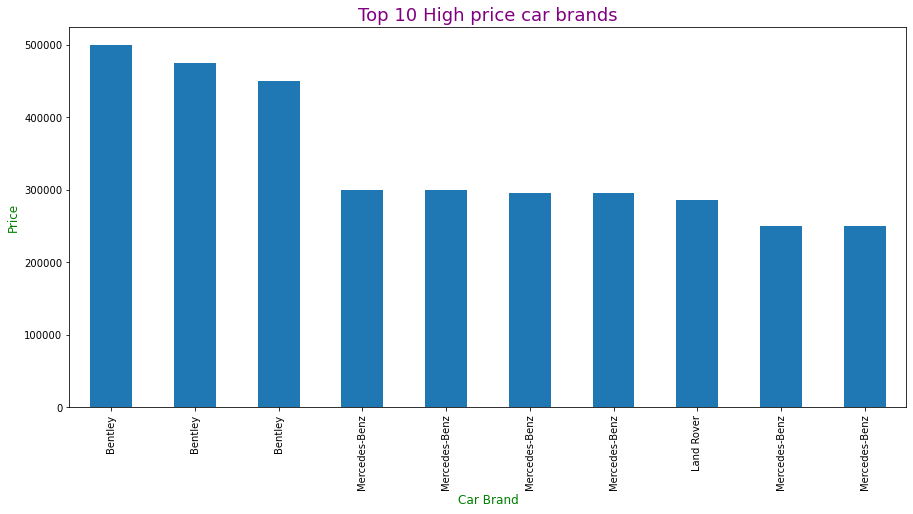

In [78]:
#plotting the bar graph to know the highg price cars
data.set_index('Brand').Price.sort_values(ascending=False)[:10].plot.bar(figsize = (15,7))

#adding some cosmetics
plt.title("Top 10 High price car brands", size = 18, color = 'purple')
plt.xlabel('Car Brand', size = 12, color = 'green')
plt.ylabel('Price', size = 12, color = 'green')

**Observation:**
- Bently, Mercedes-benz and LandRover brand cars are the highest price cars in the market.

Text(0, 0.5, 'Price')

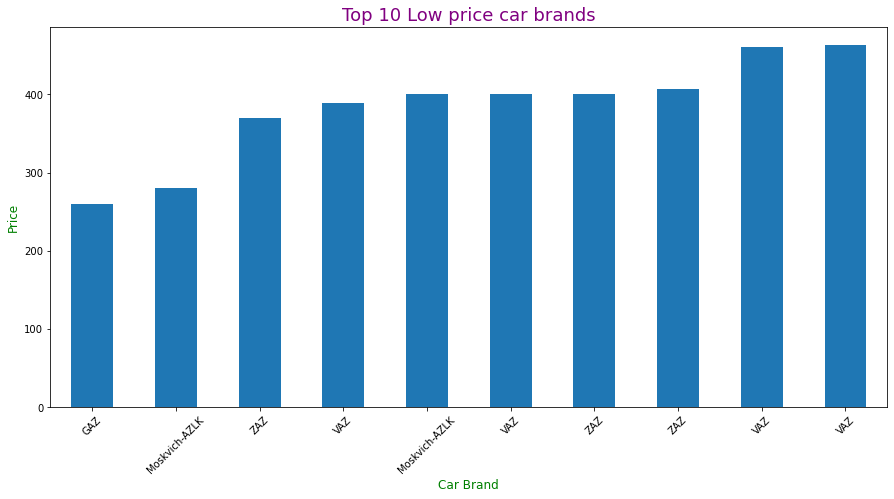

In [106]:
# plotting the bar graph to know the low price cars
data.set_index('Brand').Price.sort_values(ascending=True)[:10].plot.bar(figsize = (15,7))

#adding some cosmetics
plt.xticks(rotation = 45)
plt.title("Top 10 Low price car brands", size = 18, color = 'purple')
plt.xlabel('Car Brand', size = 12, color = 'green')
plt.ylabel('Price', size = 12, color = 'green')

**Observavtion:**
- GAZ, Moskvich-AZLK, ZAZ and VAZ car brand cars are the lowest price cars in the market.

#### **Question**:
#### Which car Brand and it's model has the highest and lowest price?

In [81]:
#adding a new column with Brand and Model
data['Brand_Model'] = data.Brand + '_' + data.Model

Text(0.5, 1.0, "Top 10 High price car brands and it's  models")

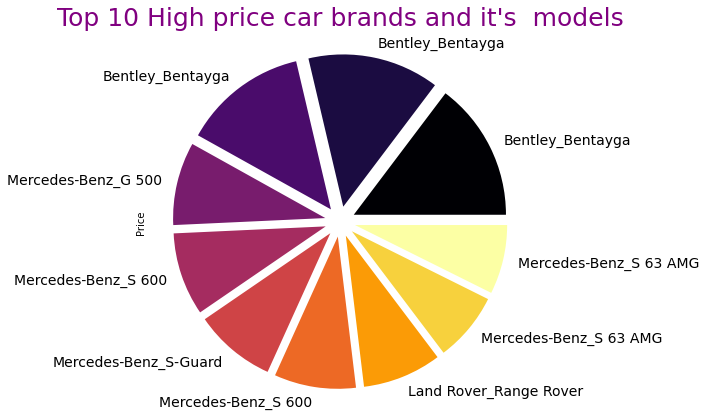

In [117]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[7,7])

# Exploding space based on the number of categories
space = np.ones(10)/10

#plotting the pie diagram
data.set_index('Brand_Model').Price.sort_values(ascending=False)[:10].plot.pie(explode = space, fontsize=14, 
                                        startangle=0, cmap='inferno')
#adding the title
plt.title("Top 10 High price car brands and it's  models", size = 25, color = 'purple')


**Observation:** 
- Top price car models are like shown in diagram above.
- Bentley_Bentayga is on top then Mercedes-Benz_G 500, Mercedes-Benz_S 600, Mercedes-Benz_S-Guard, Land Rover_Range Rover and Mercedes-Benz_S 63 AMG 

Text(0.5, 1.0, "Top 10 Low price car brands and it's  models")

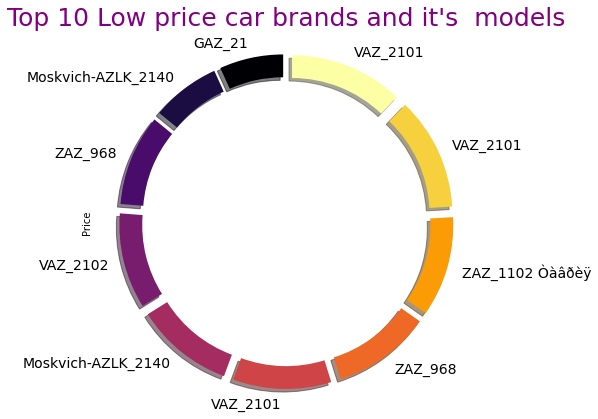

In [116]:
# Initialize figure of size 7 X 7
figure = plt.figure(figsize=[7,7])

# Exploding space based on the number of categories
space = np.ones(10)/10

# Using magic of pandas pie() function
data.set_index('Brand_Model').Price.sort_values(ascending=True)[:10].plot.pie(explode = space, fontsize=14, 
                                      wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=90, cmap='inferno')

# adding the title
plt.title("Top 10 Low price car brands and it's  models", size = 25, color = 'purple')

**Observation:** 
- Top low price car models are like shown in diagram above.
- GAZ_21, Moskvich-AZLK_2140, ZAZ_968, VAZ_2102, Moskvich-AZLK_2140, VAZ_2101, ZAZ_968, ZAZ_1102 Òàâðèÿ and VAZ_2101 models are pricing very low in the market.

### Question: What is the effect of mileage to determine the price of a car?

Text(0.5, 1.0, 'Mileage V/S Price')

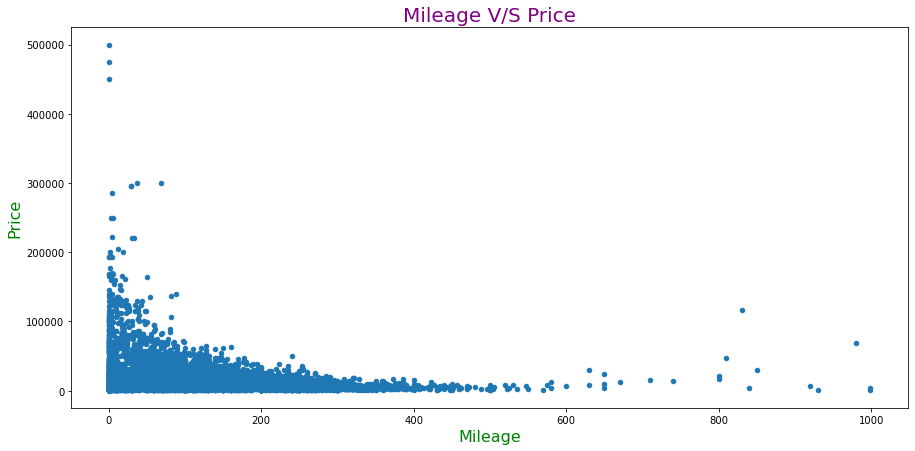

In [120]:
# Plotting a graph to compare the mileage and price
data.plot.scatter(x='Mileage', y='Price', figsize =(15,7))

#adding some cosmetics
plt.xlabel('Mileage', size = 16, color = 'green')
plt.ylabel('Price', size = 16, color = 'green')
plt.title('Mileage V/S Price', size = 20, color = 'purple')

**Observation:**
- Most of the cars which have less mileage(below 200) are pricing below 1,00,000.
- There are few cars are with less mileage and highg price. Thse may be a high end luxury or sports cars.
- The cars which have high mileage (more than 300) are very rare in market.

### Question: What is the effect of Year to determine the price of a car?


Text(0.5, 1.0, 'Year V/S Price')

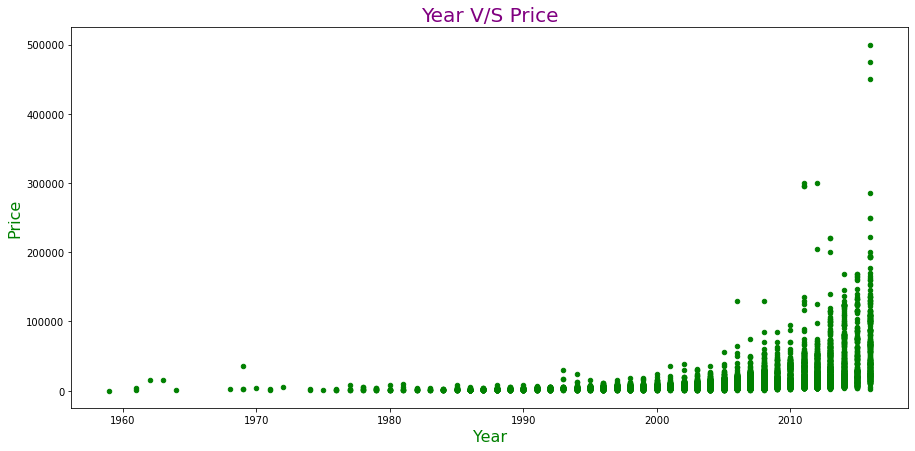

In [141]:
# Plotting a graph to compare the mileage and price
data.plot.scatter(x='Year', y='Price', figsize =(15,7), color = 'green')

#adding some cosmetics
plt.xlabel('Year', size = 16, color = 'green')
plt.ylabel('Price', size = 16, color = 'green')
plt.title('Year V/S Price', size = 20, color = 'purple')

**Observation:**
- Car manufactured year are ranging from 1960 - 2016. But all high price cars are from 2016 year only.
- We can see the pattern that as cars are becoming old the price is decreasing.
- Most of the cars are between 2007 - 2016 manufactured only

### Question: Which car and body type has the highest and lowest price ?

Text(0, 0.5, 'Car Brand')

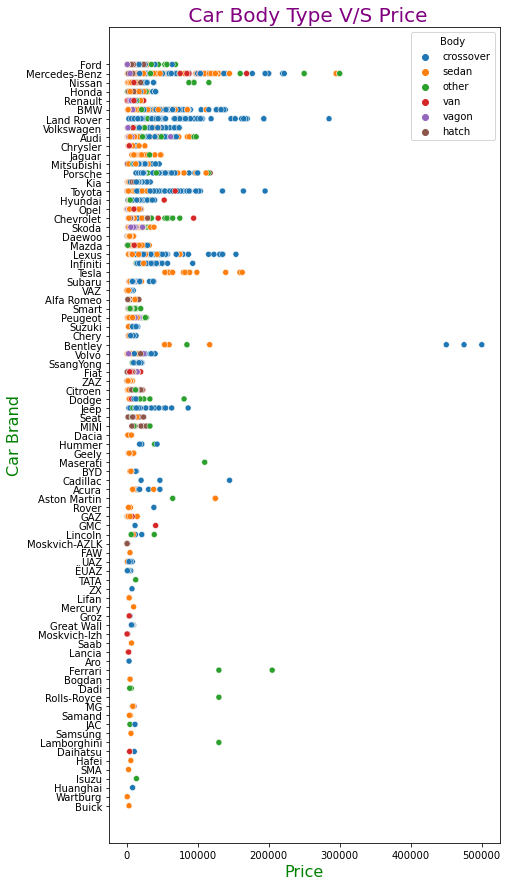

In [125]:
# Initialize figure of size 7 X 7
figure = plt.figure(figsize=[7,15])

# Plotting the graph between car Brand and price also checking it's body type.

sns.scatterplot(x='Price', y='Brand', hue='Body', data= data)

# adding some cosmetics
plt.title( " Car Body Type V/S Price", size = 20, color = 'purple')
plt.xlabel('Price', size = 16, color = 'green')
plt.ylabel('Car Brand', size = 16, color = 'green')

**Observation:**
- Crossover body type cars are pricing very high
- Sedan body type cars are pricing low.

### Question: Which car and Drive type has the highest and lowest price ?

Text(0, 0.5, 'Car Brand')

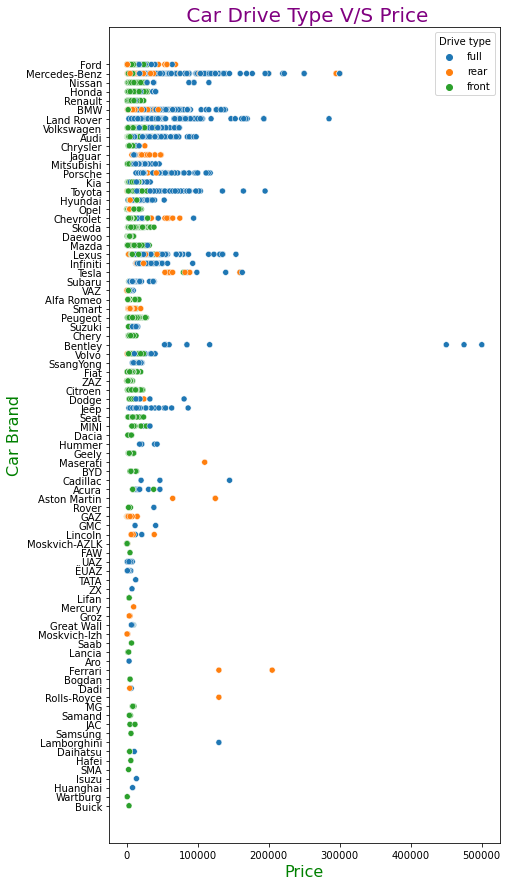

In [140]:
# Initialize figure of size 7 X 7
figure = plt.figure(figsize=[7,15])

# Plotting the graph between car Brand and price also checking it's body type.

sns.scatterplot(x='Price', y='Brand', hue='Drive type', data= data)

# adding some cosmetics
plt.title( " Car Drive Type V/S Price", size = 20, color = 'purple')
plt.xlabel('Price', size = 16, color = 'green')
plt.ylabel('Car Brand', size = 16, color = 'green')

**Observation:**
- Full drive type cars are pricing very high.
- Front drive type cars are pricing low.

### Question: What is the correlation between the features ?

<AxesSubplot:>

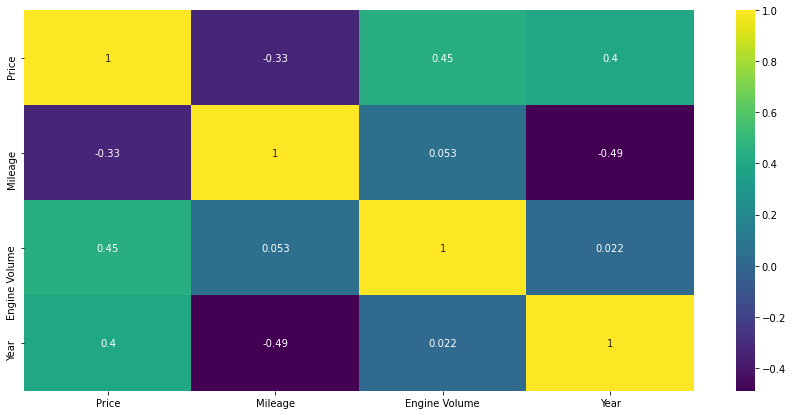

In [128]:
# Initialize figure of size 15 X 7
figure = plt.figure(figsize=[15,7])

sns.heatmap(data= data.corr(), annot = True, cmap = 'viridis')

**Observations:**
- Car price is positively correlated with Engine Volume and manufactured Year. 
- car Price is negatively correlated with Mileage.

### Question: How price is distributed among all cars ?

Text(0.5, 1.0, 'Price distribution among the cars')

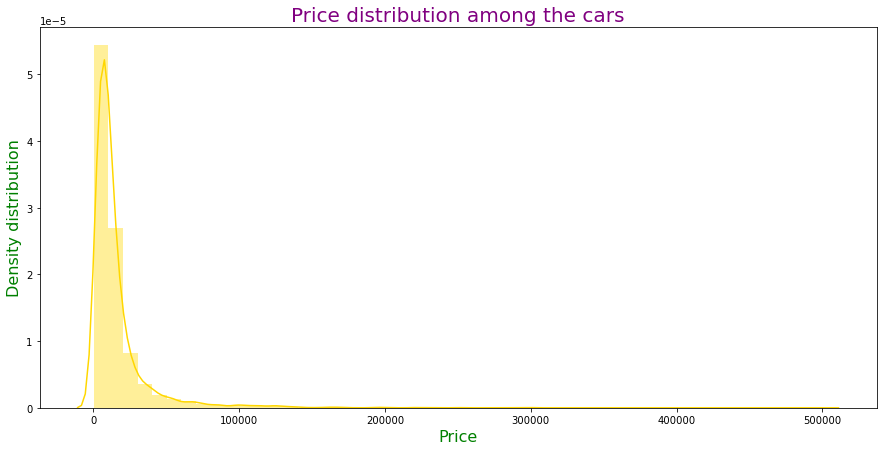

In [145]:
# Initialize figure of size 15 X 7
figure = plt.figure(figsize=[15,7])

#Checking the distribution of price
sns.distplot(a= data.Price, kde=True, color = 'gold')

#adding some cosmetics
plt.xlabel('Price', size = 16, color = 'green')
plt.ylabel('Density distribution', size = 16, color = 'green')
plt.title('Price distribution among the cars', size = 20, color = 'purple')

**Observation:**
- Most of the car prices are categorized between 10000 - 30000.
- Very less cars price is more than 50000.

### Question: Which brand is selling more cars ?

In [131]:
from collections import Counter

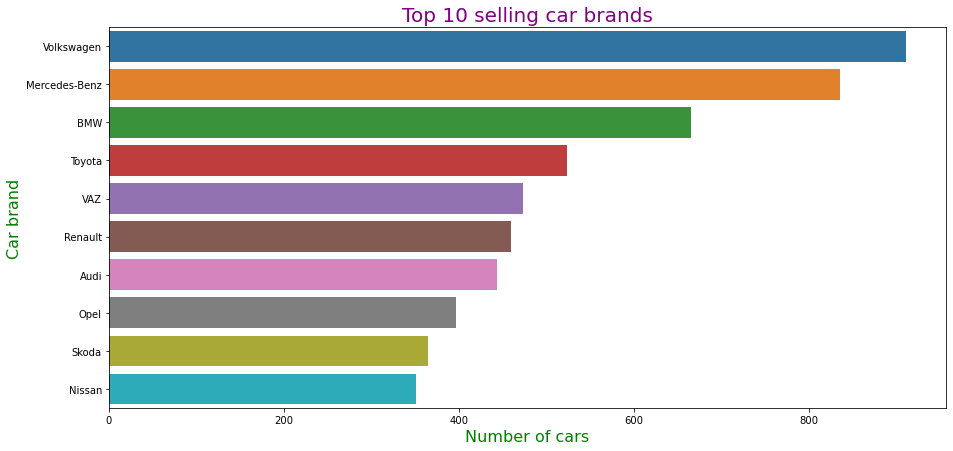

In [134]:
# collecting the number of top 10 selling cars
Top_Brand = Counter(data['Brand'].tolist()).most_common(10)
Brand_idx = [car[0] for car in Top_Brand]
Brand_val = [car[1] for car in Top_Brand]

# Initiate an empty figure
fig = plt.figure(figsize=[15, 7])

# Plot the barplot figure
sns.barplot(x=Brand_val, y=Brand_idx)

#adding some cosmetics
plt.xlabel('Number of cars', size = 16, color = 'green')
plt.ylabel('Car brand', size = 16, color = 'green')
plt.title('Top 10 selling car brands', size = 20, color = 'purple')

plt.show()

**Observation:**

- Volkswagen, Mercedes-benz and BMW car brands are the leaders in seling used cars.


# Question: Which body type is selling most in Volkswagen Brand ?

Text(0.5, 1.0, 'Volkswagen brand body type distribution')

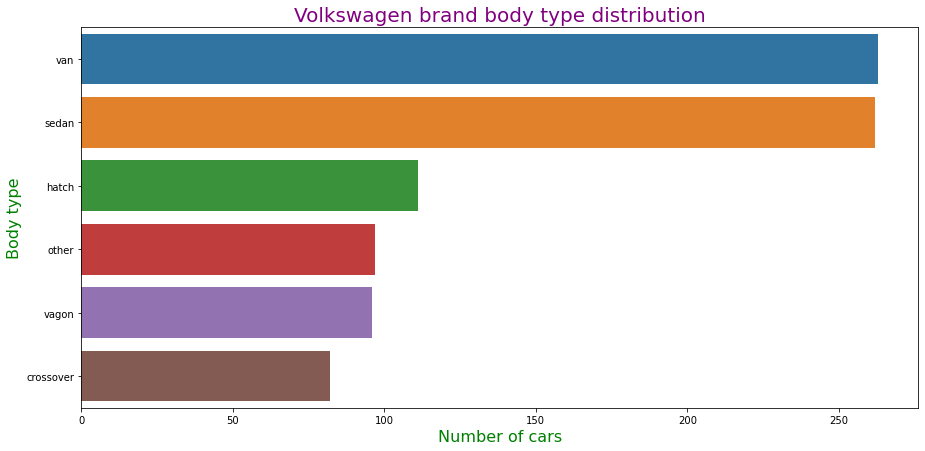

In [136]:
# Getting only Volkswagen car data
Volkswagen_data = data[data['Brand']=='Volkswagen']

frequency = Volkswagen_data['Body'].value_counts()[0:10].values
labels = Volkswagen_data['Body'].value_counts()[0:10].index

# Initiate an empty figure
fig = plt.figure(figsize=[15, 7])

# Plot the barplot figure
sns.barplot(x=frequency, y=labels)

# Adding some cosmetics
plt.xlabel('Number of cars', size= 16, color= 'green')
plt.ylabel('Body type', size = 16, color = 'green')
plt.title('Volkswagen brand body type distribution', size = 20, color = 'purple')

**Observation:**
- Most of the people are intrested to buy Volkswagen brand Sedan and Van body type cars.

### Question: Overall cars which body type most people are interested ?

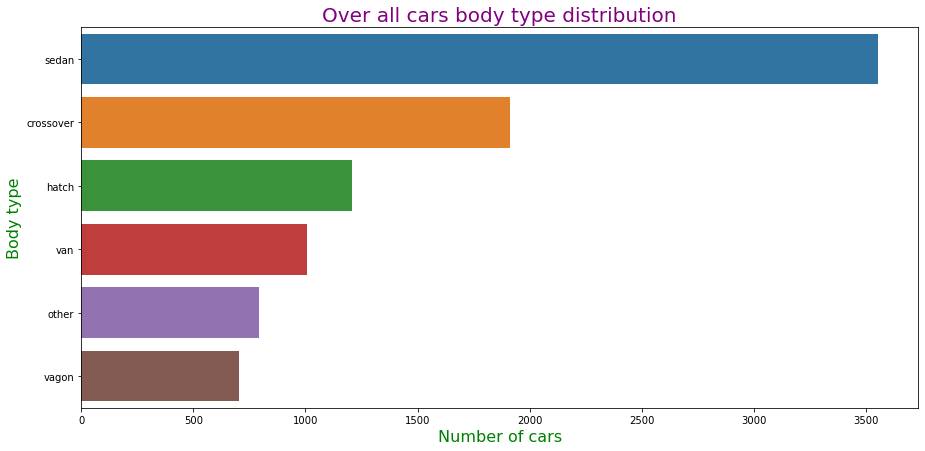

In [138]:
#Picking up the values of Body types from data.
Top_Body = Counter(data['Body'].tolist()).most_common(10)
Brand_idx = [car[0] for car in Top_Body]
Brand_val = [car[1] for car in Top_Body]

# Initiate an empty figure
fig = plt.figure(figsize=[15, 7])

# Plot the barplot figure
sns.barplot(x=Brand_val, y=Brand_idx)

# Adding some cosmetics
plt.xlabel('Number of cars', size= 16, color= 'green')
plt.ylabel('Body type', size = 16, color = 'green')
plt.title('Over all cars body type distribution', size = 20, color = 'purple')
plt.show()

**Observation:**
- When we check over all cars, most people are interested to buy Sedan or Crossover body types

### Question: Among all cars, which fuel type most people interested ?

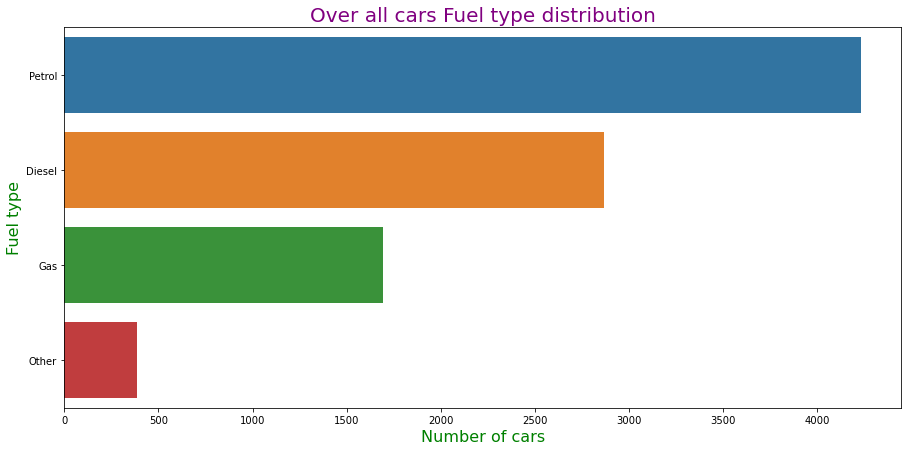

In [139]:
# picking up the values for Fuel type from all cars
Top_Fuel = Counter(data['Fuel Type'].tolist()).most_common(10)
Brand_idx = [car[0] for car in Top_Fuel]
Brand_val = [car[1] for car in Top_Fuel]

# Initiate an empty figure
fig = plt.figure(figsize=[15, 7])

# Plot the barplot figure
sns.barplot(x=Brand_val, y=Brand_idx)

# Adding some cosmetics
plt.xlabel('Number of cars', size= 16, color= 'green')
plt.ylabel('Fuel type', size = 16, color = 'green')
plt.title('Over all cars Fuel type distribution', size = 20, color = 'purple')
plt.show()

**Observation:**
- Most people are interested to but Petrol engine cars, as it may be because of good performance and low maintanance. 

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Among all cars Bently, Mercedes-benz and Land Rover cars are having high price.
    
- Among all cars GAZ, Moskvich-AZLK, ZAZ and VAZ cars are having low price.
    
- When it comes to the car models, Bentley_Bentayga is on top then Mercedes-Benz_G 500, Mercedes-Benz_S 600, Mercedes-Benz_S-Guard, Land Rover_Range Rover and Mercedes-Benz_S 63 AMG are pricing very high.
    
- There are very few cars available more than 300 Mileage and most of the cars are below 200 Mileage.
    
- People are looking to purchase cars which are manufactured after 2007 Year.

- Cross over body type and Full Drive type cars are on high price. At the same time, Sedan body type and Front Drive type cars are pricing low.

- Most of the cars price range between 10000 to 30000.

- When we compare all the cars, Volkswagen is first then Mercedes-benz and BMW brands are the top selling car brands.

- In depth looking at the Volkswagen, people are interested to purchase Van and Sedan body types.

- But in overall cars, Sedan and Crossover body types are the leaders.

- Most people are showing interest to purchase fuel type Petrol engine cars.

<a name = Section92></a>
### **9.2 Actionable Insights**

- Most of the people are showing interest to purchase a combination of Sedan body type, Petrol Fuel type and recently manufatured cars. Hence, it is advisable to promote these combination cars to increase the sales.
- Volkswagen, Mercedes-benz, BMW cars are selling highest numbers in the market. so, concentrating on these brands will help to improve business.
- The cars price which has a range of 10000 - 30000 is on high demand.

# Thank you